[View in Colaboratory](https://colab.research.google.com/github/johnphilip283/MNIST-Denoising-Autoencoder/blob/master/MNIST_Autoencoder.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
def reconstruct(data):
  
  data += tf.random_normal(tf.shape(data))
  
  conv1 = tf.layers.conv2d(data, 32, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv2 = tf.layers.conv2d(conv1, 16, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv3 = tf.layers.conv2d(conv2, 8, 4, 2, activation=tf.nn.relu, padding="SAME")
  
  # 32 x 32 x 1 -> 16 x 16 x 32
  # 16 x 16 x 32 -> 8 x 8 x 16
  # 8 x 8 x 16 -> 4 x 4 x 8
  
  conv4 = tf.layers.conv2d_transpose(conv3, 16, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv5 = tf.layers.conv2d_transpose(conv4, 32, 4, 2, activation=tf.nn.relu, padding="SAME")
  final = tf.layers.conv2d_transpose(conv5, 1, 4, 2, activation=tf.nn.relu, padding="SAME")
  
  return final

def resize_images(images):
  
  # Just it case it isn't in this form yet, reshape the tensor.
  images = images.reshape((-1, 28, 28, 1))
  
  # Initialize a tensor full of zeroes to hold the correct resized tensor
  resized_images = np.zeros((images.shape[0], 32, 32, 1))
  
  # For each image in the batch we have,
  for i in range(images.shape[0]):
    
    # find the correct slot in the resultant batch, and store the resized image there.
    resized_images[i, ..., 0] = transform.resize(images[i, ..., 0], (32, 32))
    
  return resized_images

In [3]:
inputs = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
rec_images = reconstruct(inputs)
loss = tf.reduce_mean(tf.square(rec_images - inputs))
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
batch_size = 300
epochs = 7
num_batches = mnist.train.num_examples // batch_size

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch: 1 - cost= 0.10153


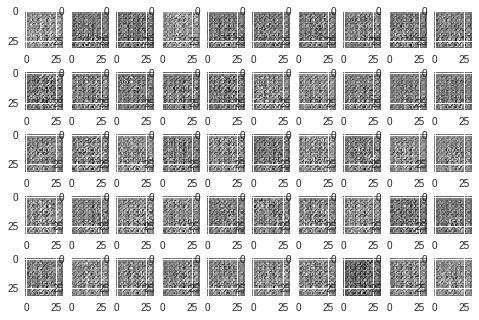

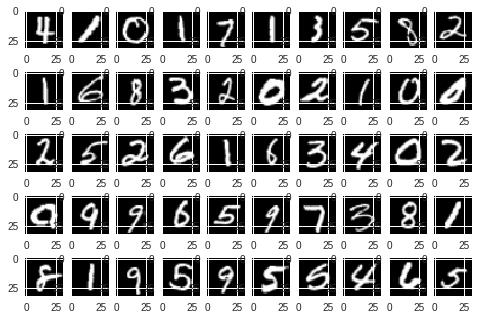

Epoch: 1 - cost= 0.08519
Epoch: 1 - cost= 0.08446
Epoch: 1 - cost= 0.08357
Epoch: 1 - cost= 0.08102
Epoch: 1 - cost= 0.08422
Epoch: 1 - cost= 0.08271
Epoch: 1 - cost= 0.08531
Epoch: 1 - cost= 0.08547
Epoch: 1 - cost= 0.08381
Epoch: 1 - cost= 0.08704
Epoch: 1 - cost= 0.08479
Epoch: 1 - cost= 0.08240
Epoch: 1 - cost= 0.08047
Epoch: 1 - cost= 0.08370
Epoch: 1 - cost= 0.08476
Epoch: 1 - cost= 0.08208
Epoch: 1 - cost= 0.08249
Epoch: 1 - cost= 0.08762
Epoch: 1 - cost= 0.08389
Epoch: 1 - cost= 0.08096
Epoch: 1 - cost= 0.08293
Epoch: 1 - cost= 0.08308
Epoch: 1 - cost= 0.08246
Epoch: 1 - cost= 0.08218
Epoch: 1 - cost= 0.08354
Epoch: 1 - cost= 0.08035
Epoch: 1 - cost= 0.08132
Epoch: 1 - cost= 0.08409
Epoch: 1 - cost= 0.08541
Epoch: 1 - cost= 0.08195
Epoch: 1 - cost= 0.07932
Epoch: 1 - cost= 0.08449
Epoch: 1 - cost= 0.08455
Epoch: 1 - cost= 0.08580
Epoch: 1 - cost= 0.08259
Epoch: 1 - cost= 0.08116
Epoch: 1 - cost= 0.08205
Epoch: 1 - cost= 0.07963
Epoch: 1 - cost= 0.08346
Epoch: 1 - cost= 0.08463


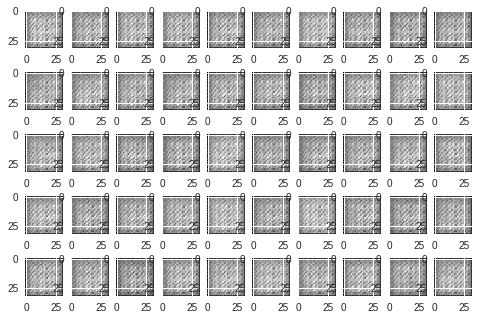

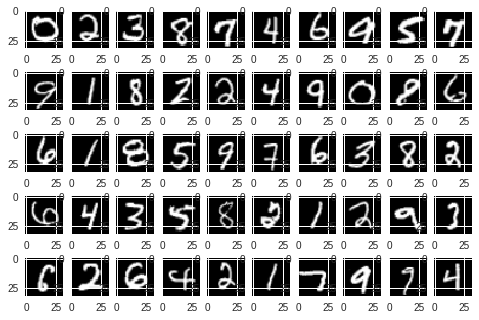

Epoch: 1 - cost= 0.08003
Epoch: 1 - cost= 0.07797
Epoch: 1 - cost= 0.07788
Epoch: 1 - cost= 0.07954
Epoch: 1 - cost= 0.07823
Epoch: 1 - cost= 0.07802
Epoch: 1 - cost= 0.07412
Epoch: 1 - cost= 0.07288
Epoch: 1 - cost= 0.07546
Epoch: 1 - cost= 0.07576
Epoch: 1 - cost= 0.07481
Epoch: 1 - cost= 0.07570
Epoch: 1 - cost= 0.07602
Epoch: 1 - cost= 0.07354
Epoch: 1 - cost= 0.07378
Epoch: 1 - cost= 0.07378
Epoch: 1 - cost= 0.07331
Epoch: 1 - cost= 0.07264
Epoch: 1 - cost= 0.07070
Epoch: 1 - cost= 0.07020
Epoch: 1 - cost= 0.07088
Epoch: 1 - cost= 0.06865
Epoch: 1 - cost= 0.06683
Epoch: 1 - cost= 0.06875
Epoch: 1 - cost= 0.06914
Epoch: 1 - cost= 0.06618
Epoch: 1 - cost= 0.06833
Epoch: 1 - cost= 0.06506
Epoch: 1 - cost= 0.06512
Epoch: 1 - cost= 0.06424
Epoch: 1 - cost= 0.06449
Epoch: 1 - cost= 0.06368
Epoch: 1 - cost= 0.06115
Epoch: 1 - cost= 0.06217
Epoch: 1 - cost= 0.06477
Epoch: 1 - cost= 0.06600
Epoch: 1 - cost= 0.07073
Epoch: 1 - cost= 0.07263
Epoch: 1 - cost= 0.09125
Epoch: 1 - cost= 0.06433


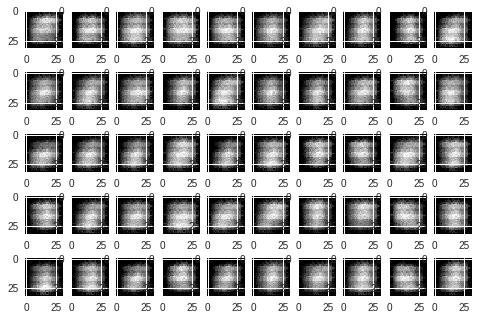

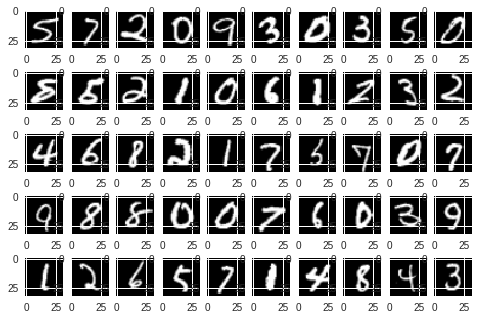

Epoch: 2 - cost= 0.05647
Epoch: 2 - cost= 0.05717
Epoch: 2 - cost= 0.05976
Epoch: 2 - cost= 0.06449
Epoch: 2 - cost= 0.08495
Epoch: 2 - cost= 0.05740
Epoch: 2 - cost= 0.05727
Epoch: 2 - cost= 0.05868
Epoch: 2 - cost= 0.07018
Epoch: 2 - cost= 0.07179
Epoch: 2 - cost= 0.10004
Epoch: 2 - cost= 0.08434
Epoch: 2 - cost= 0.05629
Epoch: 2 - cost= 0.05779
Epoch: 2 - cost= 0.06236
Epoch: 2 - cost= 0.07410
Epoch: 2 - cost= 0.06069
Epoch: 2 - cost= 0.07593
Epoch: 2 - cost= 0.06254
Epoch: 2 - cost= 0.07888
Epoch: 2 - cost= 0.05825
Epoch: 2 - cost= 0.06409
Epoch: 2 - cost= 0.06361
Epoch: 2 - cost= 0.07776
Epoch: 2 - cost= 0.05642
Epoch: 2 - cost= 0.05659
Epoch: 2 - cost= 0.05724
Epoch: 2 - cost= 0.06979
Epoch: 2 - cost= 0.06493
Epoch: 2 - cost= 0.08655
Epoch: 2 - cost= 0.05397
Epoch: 2 - cost= 0.05576
Epoch: 2 - cost= 0.05483
Epoch: 2 - cost= 0.05798
Epoch: 2 - cost= 0.06082
Epoch: 2 - cost= 0.07363
Epoch: 2 - cost= 0.05821
Epoch: 2 - cost= 0.07036
Epoch: 2 - cost= 0.06192
Epoch: 2 - cost= 0.08165


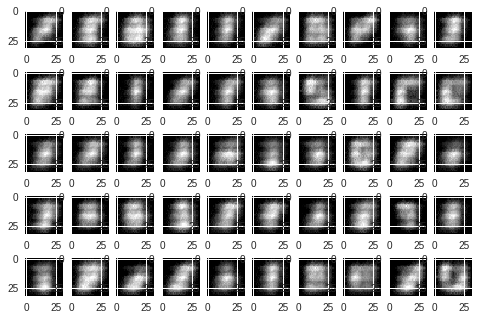

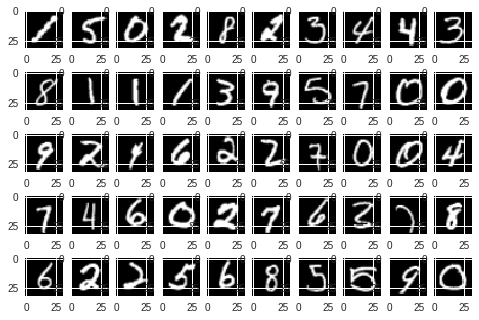

Epoch: 2 - cost= 0.05677
Epoch: 2 - cost= 0.05304
Epoch: 2 - cost= 0.05598
Epoch: 2 - cost= 0.05252
Epoch: 2 - cost= 0.05497
Epoch: 2 - cost= 0.05138
Epoch: 2 - cost= 0.05661
Epoch: 2 - cost= 0.05194
Epoch: 2 - cost= 0.05732
Epoch: 2 - cost= 0.05245
Epoch: 2 - cost= 0.05475
Epoch: 2 - cost= 0.05262
Epoch: 2 - cost= 0.05514
Epoch: 2 - cost= 0.05011
Epoch: 2 - cost= 0.05310
Epoch: 2 - cost= 0.05175
Epoch: 2 - cost= 0.05465
Epoch: 2 - cost= 0.05103
Epoch: 2 - cost= 0.05446
Epoch: 2 - cost= 0.05121
Epoch: 2 - cost= 0.05344
Epoch: 2 - cost= 0.04968
Epoch: 2 - cost= 0.05061
Epoch: 2 - cost= 0.04911
Epoch: 2 - cost= 0.05084
Epoch: 2 - cost= 0.04877
Epoch: 2 - cost= 0.05035
Epoch: 2 - cost= 0.04845
Epoch: 2 - cost= 0.05048
Epoch: 2 - cost= 0.04936
Epoch: 2 - cost= 0.04980
Epoch: 2 - cost= 0.04860
Epoch: 2 - cost= 0.04892
Epoch: 2 - cost= 0.04880
Epoch: 2 - cost= 0.05058
Epoch: 2 - cost= 0.04777
Epoch: 2 - cost= 0.04949
Epoch: 2 - cost= 0.04811
Epoch: 2 - cost= 0.04899
Epoch: 2 - cost= 0.04917


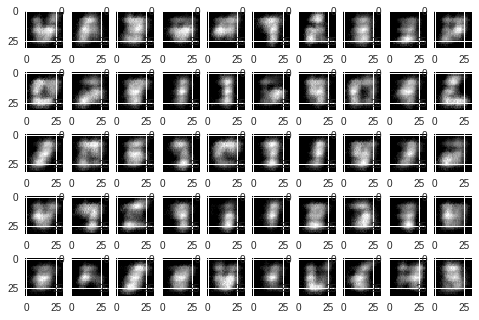

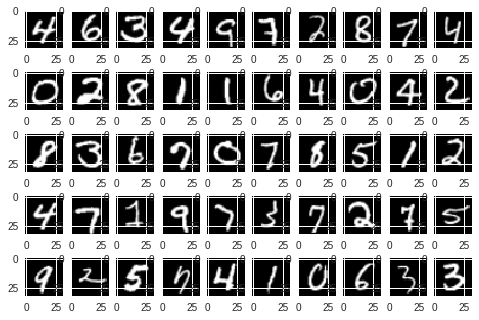

Epoch: 3 - cost= 0.04614
Epoch: 3 - cost= 0.04624
Epoch: 3 - cost= 0.04631
Epoch: 3 - cost= 0.04542
Epoch: 3 - cost= 0.04549
Epoch: 3 - cost= 0.04479
Epoch: 3 - cost= 0.04643
Epoch: 3 - cost= 0.04487
Epoch: 3 - cost= 0.04377
Epoch: 3 - cost= 0.04517
Epoch: 3 - cost= 0.04543
Epoch: 3 - cost= 0.04613
Epoch: 3 - cost= 0.04525
Epoch: 3 - cost= 0.04479
Epoch: 3 - cost= 0.04355
Epoch: 3 - cost= 0.04416
Epoch: 3 - cost= 0.04365
Epoch: 3 - cost= 0.04376
Epoch: 3 - cost= 0.04448
Epoch: 3 - cost= 0.04414
Epoch: 3 - cost= 0.04485
Epoch: 3 - cost= 0.04375
Epoch: 3 - cost= 0.04542
Epoch: 3 - cost= 0.04408
Epoch: 3 - cost= 0.04577
Epoch: 3 - cost= 0.04480
Epoch: 3 - cost= 0.04534
Epoch: 3 - cost= 0.04409
Epoch: 3 - cost= 0.04620
Epoch: 3 - cost= 0.04512
Epoch: 3 - cost= 0.04504
Epoch: 3 - cost= 0.04451
Epoch: 3 - cost= 0.04503
Epoch: 3 - cost= 0.04517
Epoch: 3 - cost= 0.04466
Epoch: 3 - cost= 0.04495
Epoch: 3 - cost= 0.04456
Epoch: 3 - cost= 0.04467
Epoch: 3 - cost= 0.04563
Epoch: 3 - cost= 0.04466


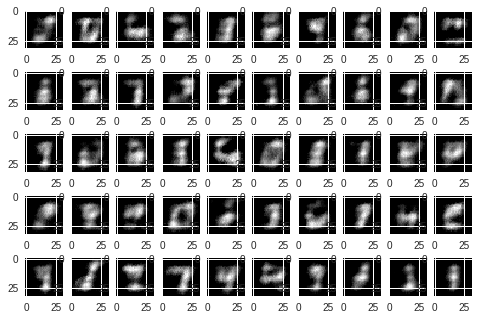

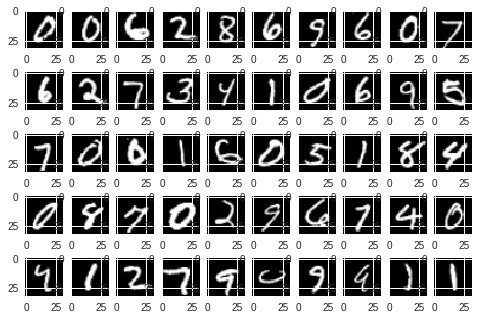

Epoch: 3 - cost= 0.04200
Epoch: 3 - cost= 0.04144
Epoch: 3 - cost= 0.04181
Epoch: 3 - cost= 0.04250
Epoch: 3 - cost= 0.04245
Epoch: 3 - cost= 0.04274
Epoch: 3 - cost= 0.04154
Epoch: 3 - cost= 0.04341
Epoch: 3 - cost= 0.04278
Epoch: 3 - cost= 0.04249
Epoch: 3 - cost= 0.04138
Epoch: 3 - cost= 0.04264
Epoch: 3 - cost= 0.04121
Epoch: 3 - cost= 0.04160
Epoch: 3 - cost= 0.04035
Epoch: 3 - cost= 0.04071
Epoch: 3 - cost= 0.04065
Epoch: 3 - cost= 0.04087
Epoch: 3 - cost= 0.04022
Epoch: 3 - cost= 0.04004
Epoch: 3 - cost= 0.03945
Epoch: 3 - cost= 0.04024
Epoch: 3 - cost= 0.04050
Epoch: 3 - cost= 0.04008
Epoch: 3 - cost= 0.04206
Epoch: 3 - cost= 0.04008
Epoch: 3 - cost= 0.03935
Epoch: 3 - cost= 0.04039
Epoch: 3 - cost= 0.03986
Epoch: 3 - cost= 0.04032
Epoch: 3 - cost= 0.04131
Epoch: 3 - cost= 0.04047
Epoch: 3 - cost= 0.04081
Epoch: 3 - cost= 0.04116
Epoch: 3 - cost= 0.03935
Epoch: 3 - cost= 0.04154
Epoch: 3 - cost= 0.04038
Epoch: 3 - cost= 0.04111
Epoch: 3 - cost= 0.04159
Epoch: 3 - cost= 0.04071


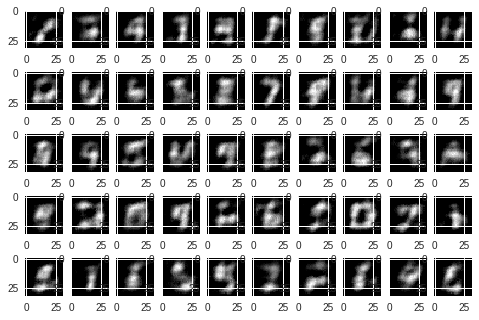

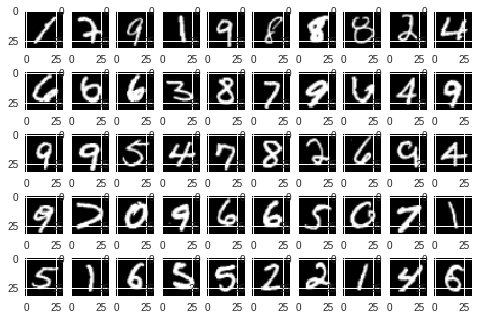

Epoch: 4 - cost= 0.03932
Epoch: 4 - cost= 0.03977
Epoch: 4 - cost= 0.03894
Epoch: 4 - cost= 0.04116
Epoch: 4 - cost= 0.03917
Epoch: 4 - cost= 0.04077
Epoch: 4 - cost= 0.04019
Epoch: 4 - cost= 0.04115
Epoch: 4 - cost= 0.04045
Epoch: 4 - cost= 0.04024
Epoch: 4 - cost= 0.03904
Epoch: 4 - cost= 0.04086
Epoch: 4 - cost= 0.03920
Epoch: 4 - cost= 0.03987
Epoch: 4 - cost= 0.03840
Epoch: 4 - cost= 0.03957
Epoch: 4 - cost= 0.03801
Epoch: 4 - cost= 0.03909
Epoch: 4 - cost= 0.03802
Epoch: 4 - cost= 0.03894
Epoch: 4 - cost= 0.03763
Epoch: 4 - cost= 0.03866
Epoch: 4 - cost= 0.03943
Epoch: 4 - cost= 0.03877
Epoch: 4 - cost= 0.03941
Epoch: 4 - cost= 0.03979
Epoch: 4 - cost= 0.03863
Epoch: 4 - cost= 0.03834
Epoch: 4 - cost= 0.03840
Epoch: 4 - cost= 0.03931
Epoch: 4 - cost= 0.03850
Epoch: 4 - cost= 0.04076
Epoch: 4 - cost= 0.03913
Epoch: 4 - cost= 0.03860
Epoch: 4 - cost= 0.03732
Epoch: 4 - cost= 0.03809
Epoch: 4 - cost= 0.03827
Epoch: 4 - cost= 0.03904
Epoch: 4 - cost= 0.03787
Epoch: 4 - cost= 0.03837


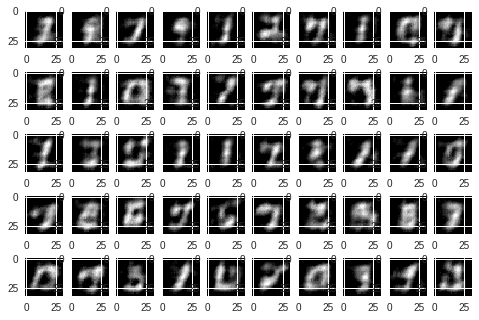

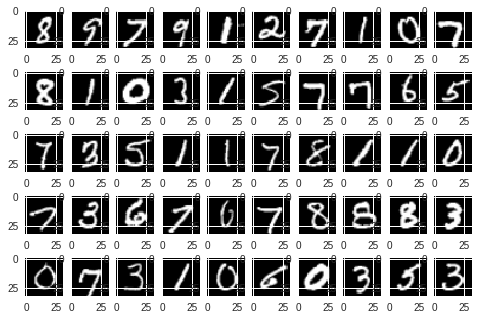

Epoch: 4 - cost= 0.03622
Epoch: 4 - cost= 0.03474
Epoch: 4 - cost= 0.03579
Epoch: 4 - cost= 0.03585
Epoch: 4 - cost= 0.03810
Epoch: 4 - cost= 0.03742
Epoch: 4 - cost= 0.03726
Epoch: 4 - cost= 0.03692
Epoch: 4 - cost= 0.03822
Epoch: 4 - cost= 0.03680
Epoch: 4 - cost= 0.03841
Epoch: 4 - cost= 0.03755
Epoch: 4 - cost= 0.03776
Epoch: 4 - cost= 0.03657
Epoch: 4 - cost= 0.03882
Epoch: 4 - cost= 0.03586
Epoch: 4 - cost= 0.03716
Epoch: 4 - cost= 0.03700
Epoch: 4 - cost= 0.03786
Epoch: 4 - cost= 0.03593
Epoch: 4 - cost= 0.03873
Epoch: 4 - cost= 0.03755
Epoch: 4 - cost= 0.03697
Epoch: 4 - cost= 0.03685
Epoch: 4 - cost= 0.03657
Epoch: 4 - cost= 0.03579
Epoch: 4 - cost= 0.03626
Epoch: 4 - cost= 0.03498
Epoch: 4 - cost= 0.03743
Epoch: 4 - cost= 0.03549
Epoch: 4 - cost= 0.03540
Epoch: 4 - cost= 0.03501
Epoch: 4 - cost= 0.03620
Epoch: 4 - cost= 0.03614
Epoch: 4 - cost= 0.03799
Epoch: 4 - cost= 0.03713
Epoch: 4 - cost= 0.03756
Epoch: 4 - cost= 0.03729
Epoch: 4 - cost= 0.03752
Epoch: 4 - cost= 0.03709


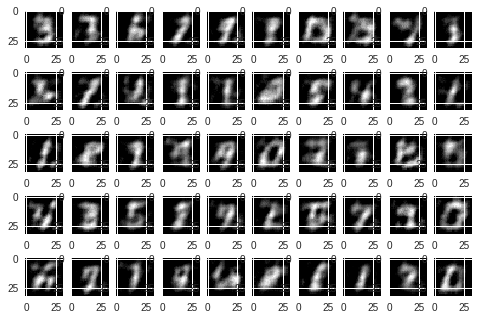

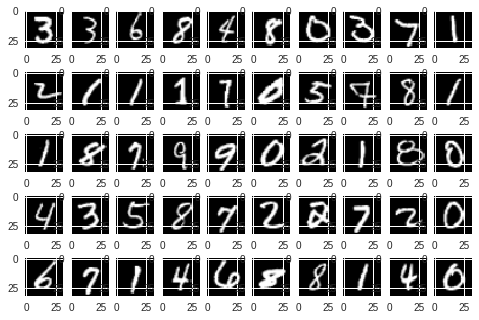

Epoch: 5 - cost= 0.03701
Epoch: 5 - cost= 0.03508
Epoch: 5 - cost= 0.03617
Epoch: 5 - cost= 0.03449
Epoch: 5 - cost= 0.03599
Epoch: 5 - cost= 0.03482
Epoch: 5 - cost= 0.03491
Epoch: 5 - cost= 0.03435
Epoch: 5 - cost= 0.03498
Epoch: 5 - cost= 0.03580
Epoch: 5 - cost= 0.03570
Epoch: 5 - cost= 0.03426
Epoch: 5 - cost= 0.03740
Epoch: 5 - cost= 0.03640
Epoch: 5 - cost= 0.03739
Epoch: 5 - cost= 0.03600
Epoch: 5 - cost= 0.03664
Epoch: 5 - cost= 0.03505
Epoch: 5 - cost= 0.03742
Epoch: 5 - cost= 0.03611
Epoch: 5 - cost= 0.03533
Epoch: 5 - cost= 0.03487
Epoch: 5 - cost= 0.03505
Epoch: 5 - cost= 0.03423
Epoch: 5 - cost= 0.03401
Epoch: 5 - cost= 0.03406
Epoch: 5 - cost= 0.03352
Epoch: 5 - cost= 0.03380
Epoch: 5 - cost= 0.03393
Epoch: 5 - cost= 0.03431
Epoch: 5 - cost= 0.03422
Epoch: 5 - cost= 0.03281
Epoch: 5 - cost= 0.03369
Epoch: 5 - cost= 0.03422
Epoch: 5 - cost= 0.03475
Epoch: 5 - cost= 0.03328
Epoch: 5 - cost= 0.03356
Epoch: 5 - cost= 0.03348
Epoch: 5 - cost= 0.03414
Epoch: 5 - cost= 0.03252


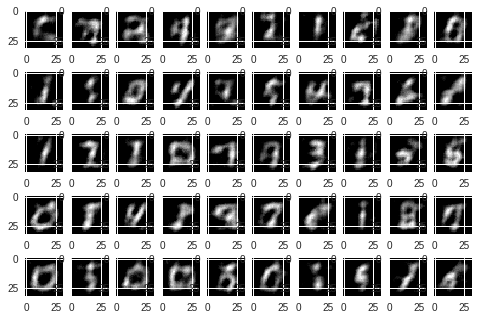

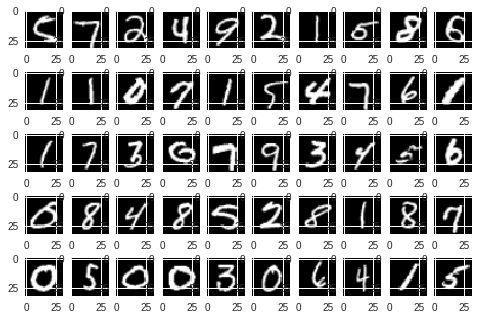

Epoch: 5 - cost= 0.03275
Epoch: 5 - cost= 0.03399
Epoch: 5 - cost= 0.03311
Epoch: 5 - cost= 0.03495
Epoch: 5 - cost= 0.03335
Epoch: 5 - cost= 0.03436
Epoch: 5 - cost= 0.03276
Epoch: 5 - cost= 0.03394
Epoch: 5 - cost= 0.03237
Epoch: 5 - cost= 0.03405
Epoch: 5 - cost= 0.03348
Epoch: 5 - cost= 0.03339
Epoch: 5 - cost= 0.03318
Epoch: 5 - cost= 0.03403
Epoch: 5 - cost= 0.03317
Epoch: 5 - cost= 0.03319
Epoch: 5 - cost= 0.03282
Epoch: 5 - cost= 0.03376
Epoch: 5 - cost= 0.03309
Epoch: 5 - cost= 0.03348
Epoch: 5 - cost= 0.03319
Epoch: 5 - cost= 0.03277
Epoch: 5 - cost= 0.03229
Epoch: 5 - cost= 0.03321
Epoch: 5 - cost= 0.03269
Epoch: 5 - cost= 0.03318
Epoch: 5 - cost= 0.03321
Epoch: 5 - cost= 0.03271
Epoch: 5 - cost= 0.03230
Epoch: 5 - cost= 0.03262
Epoch: 5 - cost= 0.03224
Epoch: 5 - cost= 0.03255
Epoch: 5 - cost= 0.03197
Epoch: 5 - cost= 0.03187
Epoch: 5 - cost= 0.03344
Epoch: 5 - cost= 0.03312
Epoch: 5 - cost= 0.03329
Epoch: 5 - cost= 0.03312
Epoch: 5 - cost= 0.03289
Epoch: 5 - cost= 0.03244


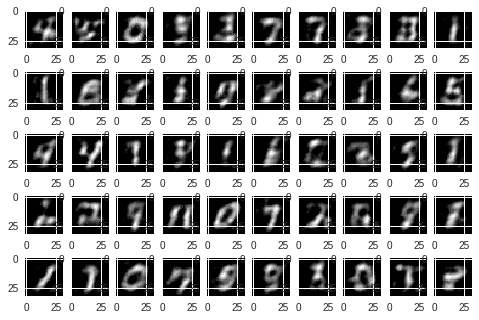

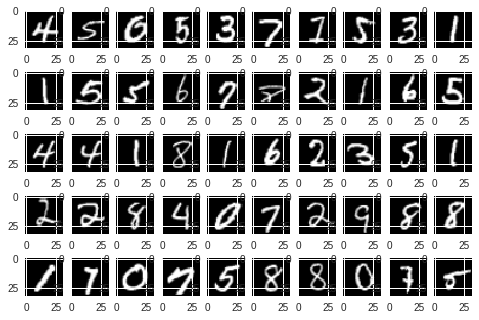

Epoch: 6 - cost= 0.03294
Epoch: 6 - cost= 0.03220
Epoch: 6 - cost= 0.03195
Epoch: 6 - cost= 0.03109
Epoch: 6 - cost= 0.03131
Epoch: 6 - cost= 0.03262
Epoch: 6 - cost= 0.03186
Epoch: 6 - cost= 0.03217
Epoch: 6 - cost= 0.03233
Epoch: 6 - cost= 0.03246
Epoch: 6 - cost= 0.03210
Epoch: 6 - cost= 0.03212
Epoch: 6 - cost= 0.03221
Epoch: 6 - cost= 0.03326
Epoch: 6 - cost= 0.03254
Epoch: 6 - cost= 0.03286
Epoch: 6 - cost= 0.03290
Epoch: 6 - cost= 0.03243
Epoch: 6 - cost= 0.03193
Epoch: 6 - cost= 0.03247
Epoch: 6 - cost= 0.03153
Epoch: 6 - cost= 0.03141
Epoch: 6 - cost= 0.03266
Epoch: 6 - cost= 0.03239
Epoch: 6 - cost= 0.03254
Epoch: 6 - cost= 0.03242
Epoch: 6 - cost= 0.03199
Epoch: 6 - cost= 0.03274
Epoch: 6 - cost= 0.03351
Epoch: 6 - cost= 0.03289
Epoch: 6 - cost= 0.03155
Epoch: 6 - cost= 0.03217
Epoch: 6 - cost= 0.03201
Epoch: 6 - cost= 0.03311
Epoch: 6 - cost= 0.03285
Epoch: 6 - cost= 0.03330
Epoch: 6 - cost= 0.03229
Epoch: 6 - cost= 0.03243
Epoch: 6 - cost= 0.03232
Epoch: 6 - cost= 0.03254


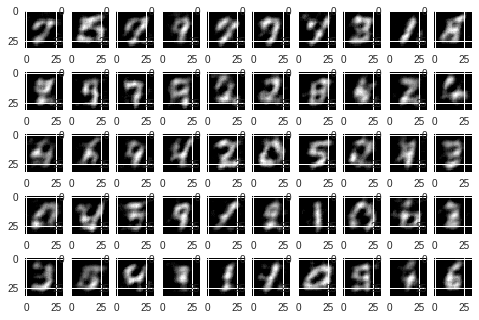

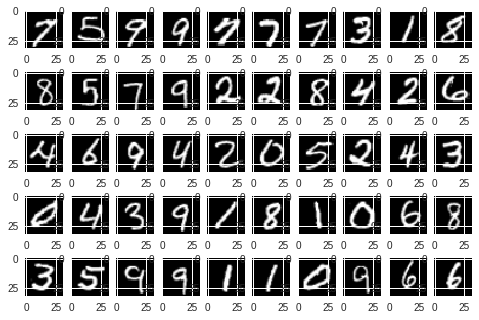

Epoch: 6 - cost= 0.03108
Epoch: 6 - cost= 0.03180
Epoch: 6 - cost= 0.03195
Epoch: 6 - cost= 0.03155
Epoch: 6 - cost= 0.03204
Epoch: 6 - cost= 0.03106
Epoch: 6 - cost= 0.03139
Epoch: 6 - cost= 0.03009
Epoch: 6 - cost= 0.03217
Epoch: 6 - cost= 0.03222
Epoch: 6 - cost= 0.03201
Epoch: 6 - cost= 0.03241
Epoch: 6 - cost= 0.03170
Epoch: 6 - cost= 0.03071
Epoch: 6 - cost= 0.03219
Epoch: 6 - cost= 0.03121
Epoch: 6 - cost= 0.03068
Epoch: 6 - cost= 0.03070
Epoch: 6 - cost= 0.03153
Epoch: 6 - cost= 0.03135
Epoch: 6 - cost= 0.03060
Epoch: 6 - cost= 0.03057
Epoch: 6 - cost= 0.03126
Epoch: 6 - cost= 0.02999
Epoch: 6 - cost= 0.03095
Epoch: 6 - cost= 0.03141
Epoch: 6 - cost= 0.03085
Epoch: 6 - cost= 0.03174
Epoch: 6 - cost= 0.03179
Epoch: 6 - cost= 0.03044
Epoch: 6 - cost= 0.03119
Epoch: 6 - cost= 0.03138
Epoch: 6 - cost= 0.03228
Epoch: 6 - cost= 0.03135
Epoch: 6 - cost= 0.03151
Epoch: 6 - cost= 0.03168
Epoch: 6 - cost= 0.03339
Epoch: 6 - cost= 0.03219
Epoch: 6 - cost= 0.03175
Epoch: 6 - cost= 0.03344


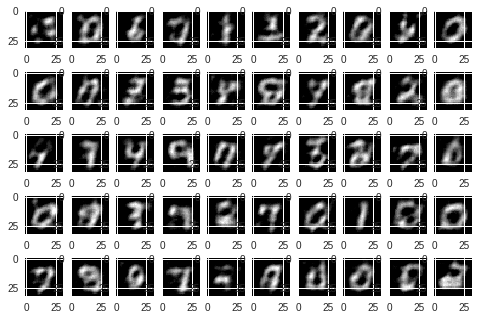

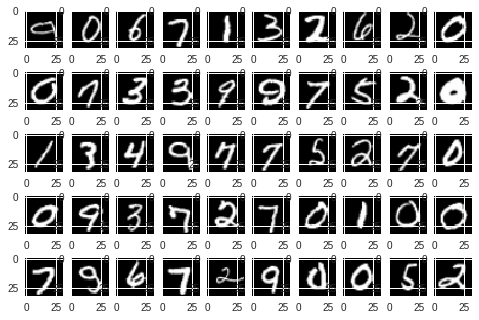

Epoch: 7 - cost= 0.03074
Epoch: 7 - cost= 0.03052
Epoch: 7 - cost= 0.03050
Epoch: 7 - cost= 0.03004
Epoch: 7 - cost= 0.03126
Epoch: 7 - cost= 0.03016
Epoch: 7 - cost= 0.03140
Epoch: 7 - cost= 0.03185
Epoch: 7 - cost= 0.03306
Epoch: 7 - cost= 0.03142
Epoch: 7 - cost= 0.03135
Epoch: 7 - cost= 0.03183
Epoch: 7 - cost= 0.03121
Epoch: 7 - cost= 0.03086
Epoch: 7 - cost= 0.03185
Epoch: 7 - cost= 0.03052
Epoch: 7 - cost= 0.03058
Epoch: 7 - cost= 0.03044
Epoch: 7 - cost= 0.03121
Epoch: 7 - cost= 0.03056
Epoch: 7 - cost= 0.03051
Epoch: 7 - cost= 0.02999
Epoch: 7 - cost= 0.02924
Epoch: 7 - cost= 0.03034
Epoch: 7 - cost= 0.03062
Epoch: 7 - cost= 0.02960
Epoch: 7 - cost= 0.03068
Epoch: 7 - cost= 0.02986
Epoch: 7 - cost= 0.02938
Epoch: 7 - cost= 0.02999
Epoch: 7 - cost= 0.03168
Epoch: 7 - cost= 0.03038
Epoch: 7 - cost= 0.02895
Epoch: 7 - cost= 0.02984
Epoch: 7 - cost= 0.03048
Epoch: 7 - cost= 0.02978
Epoch: 7 - cost= 0.03030
Epoch: 7 - cost= 0.03018
Epoch: 7 - cost= 0.03001
Epoch: 7 - cost= 0.03101


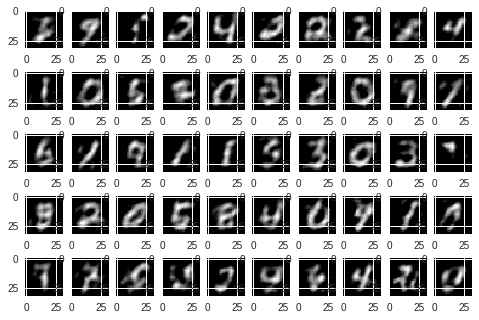

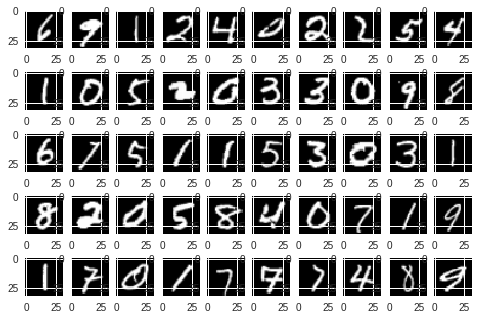

Epoch: 7 - cost= 0.02999
Epoch: 7 - cost= 0.03010
Epoch: 7 - cost= 0.03005
Epoch: 7 - cost= 0.02965
Epoch: 7 - cost= 0.03026
Epoch: 7 - cost= 0.03034
Epoch: 7 - cost= 0.03021
Epoch: 7 - cost= 0.03006
Epoch: 7 - cost= 0.02987
Epoch: 7 - cost= 0.02911
Epoch: 7 - cost= 0.02991
Epoch: 7 - cost= 0.03062
Epoch: 7 - cost= 0.03011
Epoch: 7 - cost= 0.02975
Epoch: 7 - cost= 0.02953
Epoch: 7 - cost= 0.02928
Epoch: 7 - cost= 0.03041
Epoch: 7 - cost= 0.03008
Epoch: 7 - cost= 0.03008
Epoch: 7 - cost= 0.03019
Epoch: 7 - cost= 0.03013
Epoch: 7 - cost= 0.03027
Epoch: 7 - cost= 0.03000
Epoch: 7 - cost= 0.03054
Epoch: 7 - cost= 0.03041
Epoch: 7 - cost= 0.03015
Epoch: 7 - cost= 0.03019
Epoch: 7 - cost= 0.03042
Epoch: 7 - cost= 0.03027
Epoch: 7 - cost= 0.03080
Epoch: 7 - cost= 0.02996
Epoch: 7 - cost= 0.03028
Epoch: 7 - cost= 0.03143
Epoch: 7 - cost= 0.03010
Epoch: 7 - cost= 0.03045
Epoch: 7 - cost= 0.02969
Epoch: 7 - cost= 0.03087
Epoch: 7 - cost= 0.03103
Epoch: 7 - cost= 0.03012
Epoch: 7 - cost= 0.03080


In [0]:
with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(epochs):
    for batch in range(num_batches):
      
      images, _ = mnist.train.next_batch(batch_size)
      images = images.reshape((-1, 28, 28, 1))
      images = resize_images(images)
      
      
      _, num_loss = sess.run([train_op, loss], feed_dict={inputs: images})
         
      print('Epoch: {} - cost= {:.5f}'.format((epoch + 1), num_loss))
      
      if batch % 100 == 0:
        
        _, num_loss, re_images = sess.run([train_op, loss, rec_images], feed_dict={inputs: images})
        
        plt.figure(1)
        plt.title('Reconstructed Images')
        for i in range(50):
          plt.subplot(5, 10, i+1)
          plt.imshow(re_images[i, ..., 0], cmap='gray')

        plt.figure(2)
        plt.title('Input Images')
        for i in range(50):
          plt.subplot(5, 10, i+1)
          plt.imshow(images[i, ..., 0], cmap='gray')
        plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


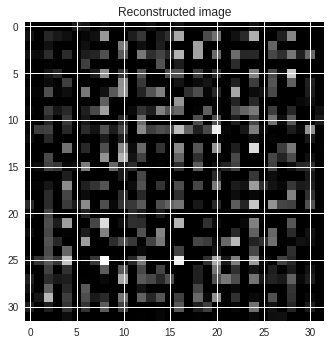

In [6]:
with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())
  images, _ = mnist.train.next_batch(1)
  images = images.reshape((-1, 28, 28, 1))
  images = resize_images(images)
  
  image = sess.run([rec_images], feed_dict={inputs: images})[0]
  
  plt.figure(1)
  plt.title("Reconstructed image")
  plt.imshow(image[0, ..., 0], cmap="gray")
  plt.show()